## **Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

## **Loading the Dataset**

In [ ]:
car_data = pd.read_csv("car_price_data1.csv")

In [ ]:
car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Peprocessing

### `Exploring the descriptive statistics of the variables`

In [ ]:
car_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


# Check for any missing values and treat it

In [ ]:
df=car_data
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [ ]:
df_no_mv = df.dropna()

In [ ]:
df_no_mv.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## **Data Exploration and Analysis**

The probability distribution will show us how that variable is distributed

Price

<ipython-input-9-d72e9ec5435c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn = sns.distplot(df_no_mv['Price'] , color='blue')


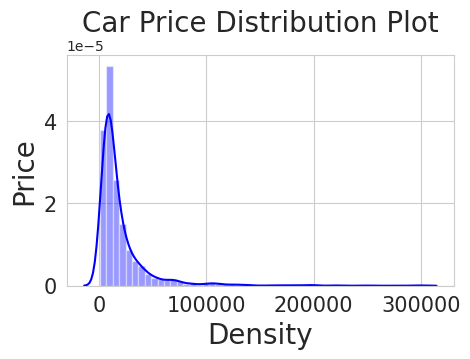

In [ ]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[5,3])
dn = sns.distplot(df_no_mv['Price'] , color='blue')
# plt.title('Car Price Distribution Plot')
dn.axes.set_title('Car Price Distribution Plot',fontsize=20)
dn.set_xlabel("Density",fontsize=20)
dn.set_ylabel("Price",fontsize=20)
dn.tick_params(labelsize=15)

Box plot show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

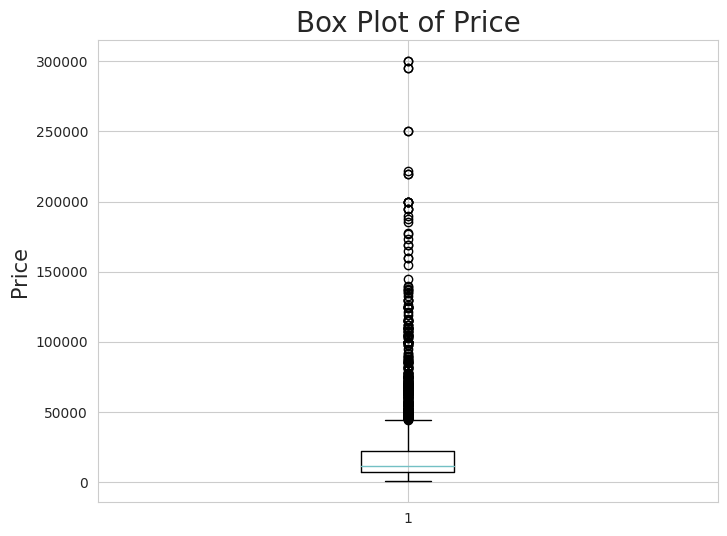

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Price'])
plt.title('Box Plot of Price', fontsize=20)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
# Dealing with outliers

# variable q that will be equal to the 99th percentile of the 'Price' variable
q = df_no_mv['Price'].quantile(0.99)

df_no_mv = df_no_mv[df_no_mv['Price']<q]

<ipython-input-12-0b95730af41b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn1 = sns.distplot(df_no_mv['Price'] , color='blue')


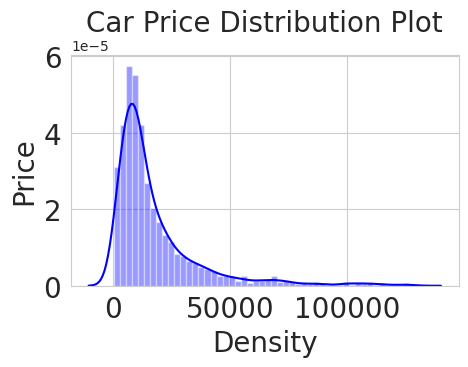

In [ ]:
plt.figure(figsize=[5,3])
dn1 = sns.distplot(df_no_mv['Price'] , color='blue')
dn1.axes.set_title('Car Price Distribution Plot',fontsize=20)
dn1.set_xlabel("Density",fontsize=20)
dn1.set_ylabel("Price",fontsize=20)
dn1.tick_params(labelsize=20)

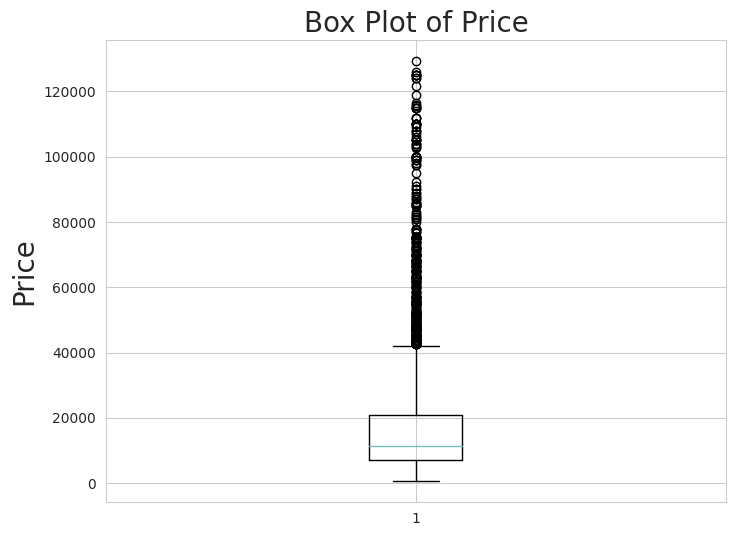

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Price'])
plt.title('Box Plot of Price',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

Mileage

<ipython-input-14-b88761e92d38>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn2 = sns.distplot(df_no_mv['Mileage'],color='blue')


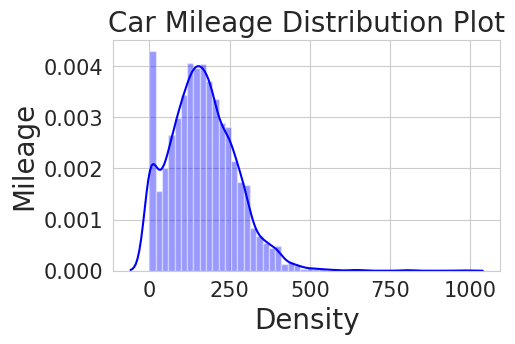

In [ ]:
plt.figure(figsize=[5,3])
dn2 = sns.distplot(df_no_mv['Mileage'],color='blue')
# plt.title()
dn2.axes.set_title('Car Mileage Distribution Plot',fontsize=20)
dn2.set_xlabel("Density",fontsize=20)
dn2.set_ylabel("Mileage",fontsize=20)
dn2.tick_params(labelsize=15)

Box plot for mileage elps in understanding the spread of mileage among the vehicles

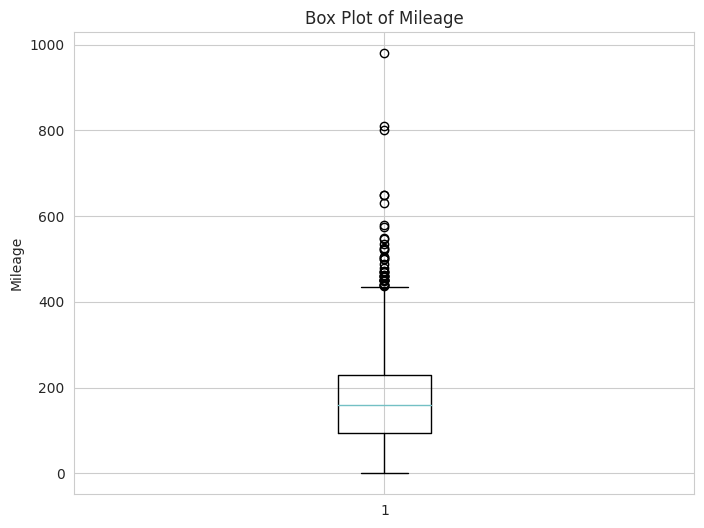

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Mileage'])
plt.title('Box Plot of Mileage')
plt.ylabel('Mileage')
plt.show()

In [ ]:
q = df_no_mv['Mileage'].quantile(0.99)

df_no_mv = df_no_mv[df_no_mv['Mileage']<q]

<ipython-input-17-e859535d3c0a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn3 = sns.distplot(df_no_mv['Mileage'],color='blue')


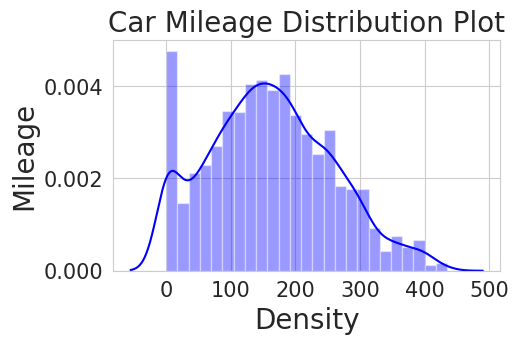

In [ ]:
plt.figure(figsize=[5,3])
dn3 = sns.distplot(df_no_mv['Mileage'],color='blue')
dn3.axes.set_title('Car Mileage Distribution Plot',fontsize=20)
dn3.set_xlabel("Density",fontsize=20)
dn3.set_ylabel("Mileage",fontsize=20)
dn3.tick_params(labelsize=15)

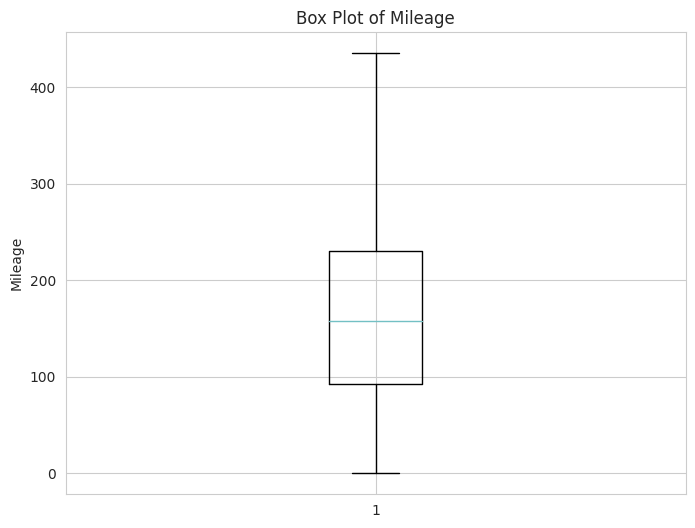

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['Mileage'])
plt.title('Box Plot of Mileage')
plt.ylabel('Mileage')
plt.show()

Enginev

<ipython-input-19-ddd030e6716d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn4 = sns.distplot(df_no_mv['EngineV'],color='blue')


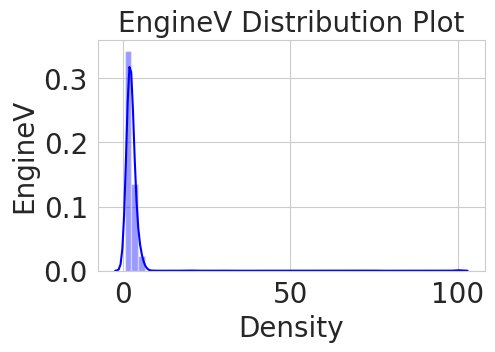

In [ ]:
plt.figure(figsize=[5,3])
dn4 = sns.distplot(df_no_mv['EngineV'],color='blue')
# plt.title('')
dn4.axes.set_title('EngineV Distribution Plot',fontsize=20)
dn4.set_xlabel("Density",fontsize=20)
dn4.set_ylabel("EngineV",fontsize=20)
dn4.tick_params(labelsize=20)

Box plot for the engineV shows us the variability in engine size of different vehicles

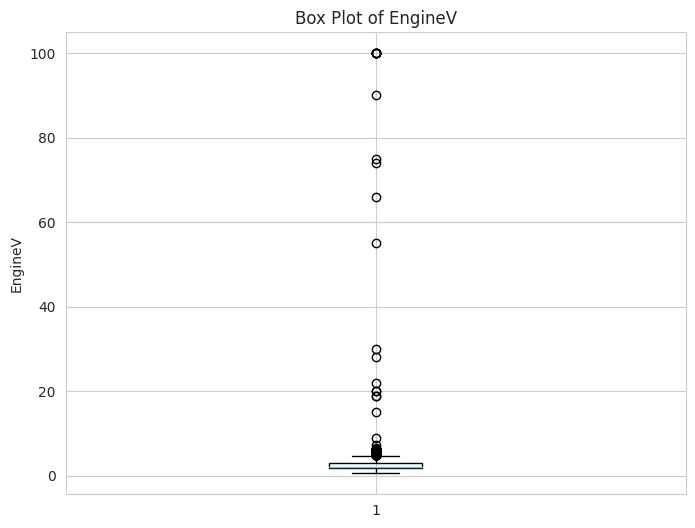

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['EngineV'])
plt.title('Box Plot of EngineV')
plt.ylabel('EngineV')
plt.show()

In [ ]:
df_no_mv = df_no_mv[df_no_mv['EngineV']<6.5]

<ipython-input-22-aa60f018afa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dn5 = sns.distplot(df_no_mv['EngineV'],color='blue')


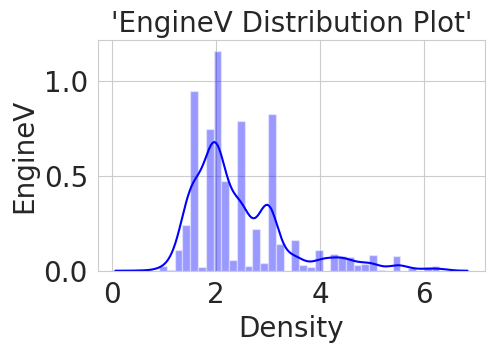

In [ ]:
plt.figure(figsize=[5,3])
dn5 = sns.distplot(df_no_mv['EngineV'],color='blue')
dn5.axes.set_title("'EngineV Distribution Plot'",fontsize=20)
dn5.set_xlabel("Density",fontsize=20)
dn5.set_ylabel("EngineV",fontsize=20)
dn5.tick_params(labelsize=20)

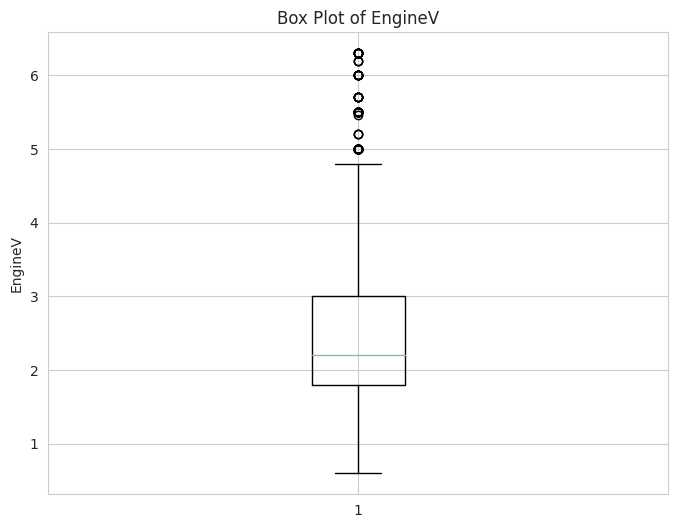

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_mv['EngineV'])
plt.title('Box Plot of EngineV')
plt.ylabel('EngineV')
plt.show()

Year

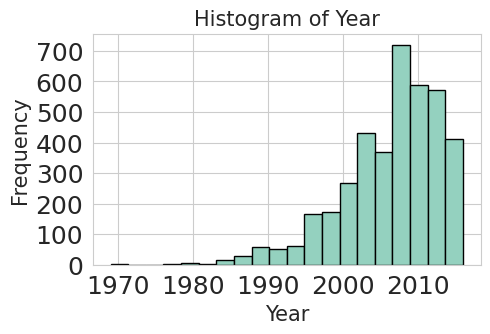

In [ ]:
# Create a histogram for Year
plt.figure(figsize=(5,3))
plt.hist(df_no_mv['Year'], bins=20, edgecolor='k')
plt.title('Histogram of Year', fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Frequency',fontsize=15)
plt.show()

Body

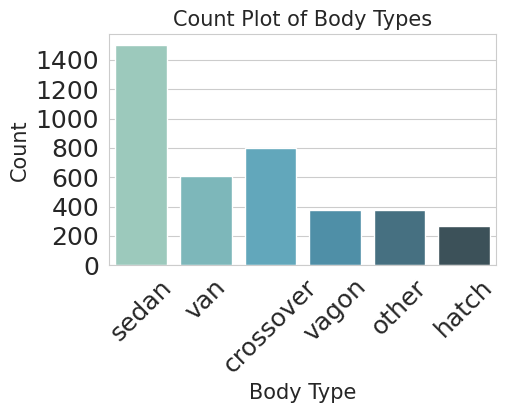

In [ ]:
import seaborn as sns

# Create a count plot for Body
plt.figure(figsize=(5,3))
sns.countplot(data=df_no_mv, x='Body')
plt.title('Count Plot of Body Types',fontsize=15)
plt.xlabel('Body Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45,fontsize=18)  # Rotate x-axis labels for better readability if needed
plt.yticks(fontsize=18)
plt.show()

Engine Type

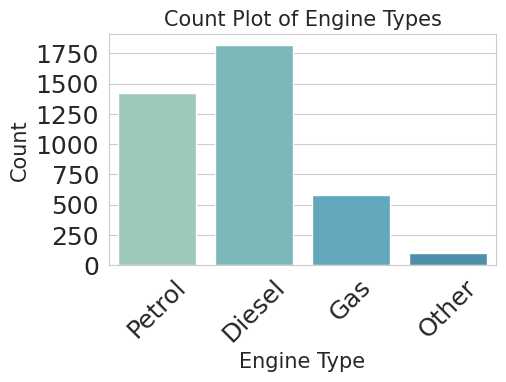

In [ ]:
# Create a count plot for Engine Type
plt.figure(figsize=(5,3))
sns.countplot(data=df_no_mv, x='Engine Type')
plt.title('Count Plot of Engine Types',fontsize=15)
plt.xlabel('Engine Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45,fontsize=18)  # Rotate x-axis labels for better readability if needed
plt.yticks(fontsize=18)
plt.show()

Model

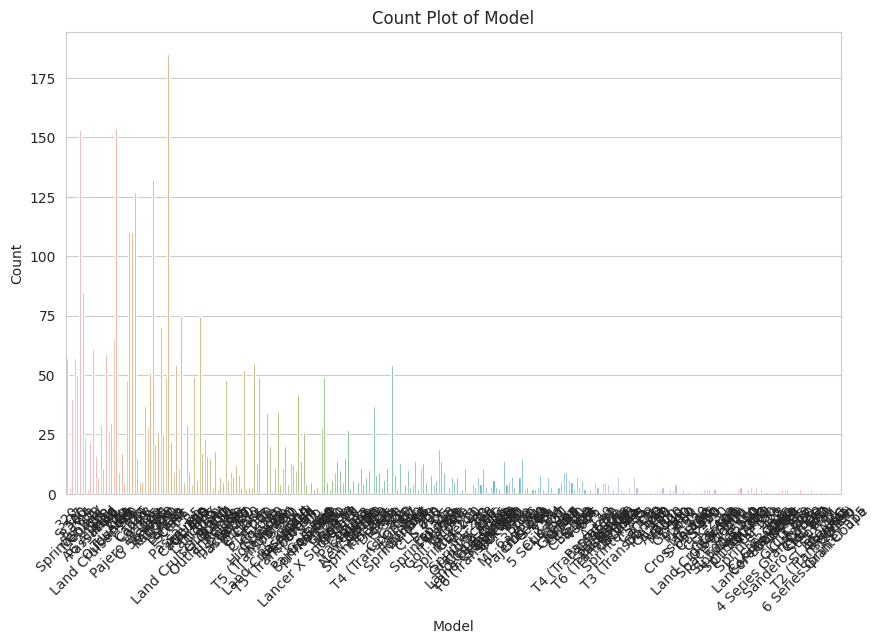

In [ ]:
# Create a count plot for Model
plt.figure(figsize=(10, 6))
sns.countplot(data=df_no_mv, x='Model')
plt.title('Count Plot of Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
cleaned_data = df_no_mv.reset_index(drop=True)

In [ ]:
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3916,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3917,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3918,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
3919,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


# Checking the linearity using a scatter plot

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 [Text(0, -20000.0, '−20000'),
  Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000')])

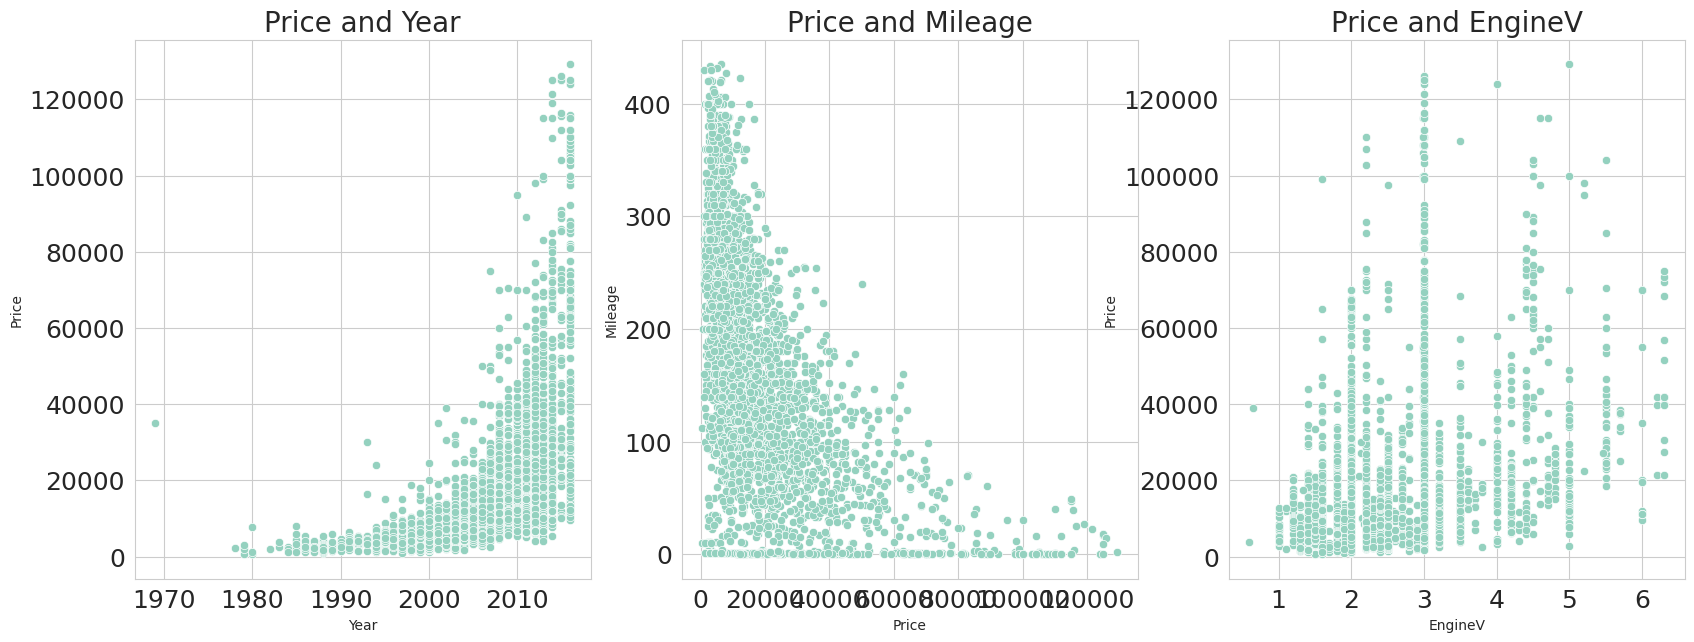

In [ ]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year", fontsize=20)
sns.scatterplot(x='Year',y='Price',data=cleaned_data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1,3,2)
plt.title("Price and Mileage", fontsize=20)
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

We can spot patterns but not perfect linear once.

<ipython-input-31-17bfed50433e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

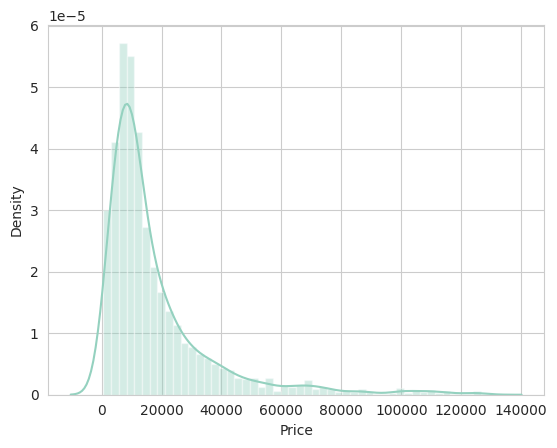

In [ ]:
sns.distplot(cleaned_data['Price'])

# Transform 'Price' with a log transformation

In [ ]:
log_price = np.log(cleaned_data['Price'])

cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


Text(0.5, 1.0, 'Log price and EngineV')

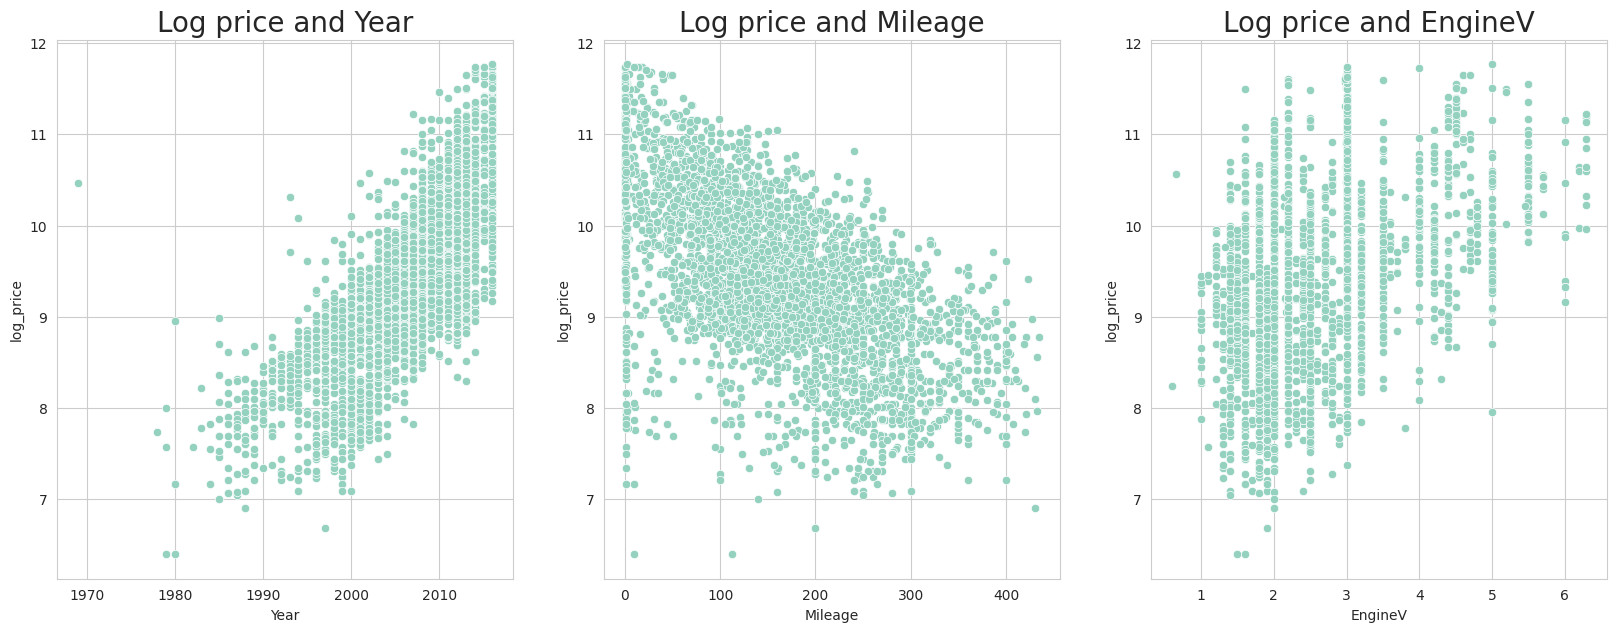

In [ ]:

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year", fontdict={'fontsize':20})
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage", fontdict={'fontsize':20})
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV", fontdict={'fontsize':20})

In [ ]:
cleaned_data = cleaned_data.drop(['Price'],axis=1)

## **Feature Selection**

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

### Checking Multicollinearity Using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','EngineV','Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791073,Mileage
1,7.671170,EngineV
2,10.397185,Year


In [ ]:
cleaned_data= cleaned_data.drop('Year',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
temp_data = cleaned_data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])


print('\n--Correlated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correlated Features with target variable--

Mileage         0.603102
Registration    0.442582
EngineV         0.415116
Body            0.375160
Model           0.220312
Brand           0.098418
Engine Type     0.004904
dtype: float64


In [ ]:
temp_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,1,3,277,2.0,3,1,18,8.342840
1,2,5,427,2.9,0,1,254,8.974618
2,2,3,358,5.0,1,1,228,9.495519
3,0,0,240,4.2,3,1,216,10.043249
4,5,0,120,2.0,3,1,219,9.814656


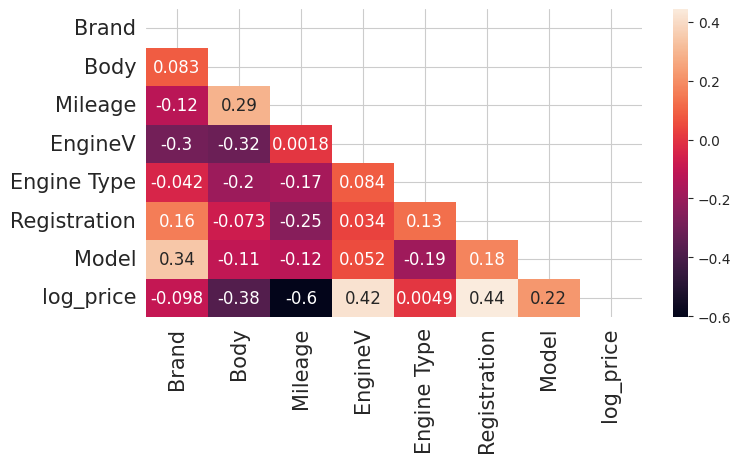

In [ ]:
plt.figure(figsize=[8,4])
corr=temp_data.corr()
matrix=np.triu(corr)
annot_kws={'fontsize': 12}
dn6 = sns.heatmap(corr, annot=True  , mask=matrix , annot_kws=annot_kws)
# dn1.axes.set_title('Car Price Distribution Plot',fontsize=15)
# dn1.set_xlabel("Density",fontsize=20)
# dn1.set_ylabel("Price",fontsize=20)
dn6.tick_params(labelsize=15)

## **Feature Importance**

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

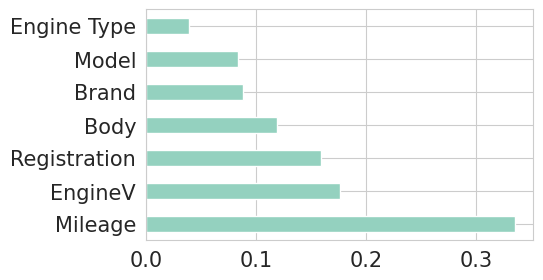

In [ ]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[5,3])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# dn1.axes.set_title('Car Price Distribution Plot',fontsize=15)
# dn1.set_xlabel("Density",fontsize=20)
# dn1.set_ylabel("Price",fontsize=20)
plt.tick_params(labelsize=15)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
print(feat_importances.sort_values(ascending=False))

Mileage         0.335040
EngineV         0.176510
Registration    0.159232
Body            0.118929
Brand           0.087967
Model           0.083410
Engine Type     0.038912
dtype: float64


## **Categorical Features**

In [ ]:
data_with_dummies = pd.get_dummies(cleaned_data,drop_first=True)

In [ ]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Development

# Declaring dependent and independent variable

In [ ]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [ ]:
inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [ ]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

In [ ]:
input_scaled2.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,1.204716,-0.468774,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.766305,0.482522,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.047974,2.702213,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.819524,1.856616,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.429747,-0.468774,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# **Model Development**

Linear Regression


MAE: 0.3364460604516564
MSE: 0.22540774843809055
RMSE: 0.4747712590691338
R2_score: 0.7254481890019693


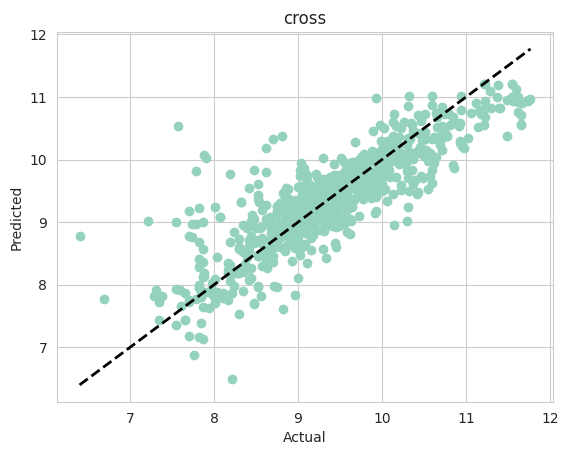

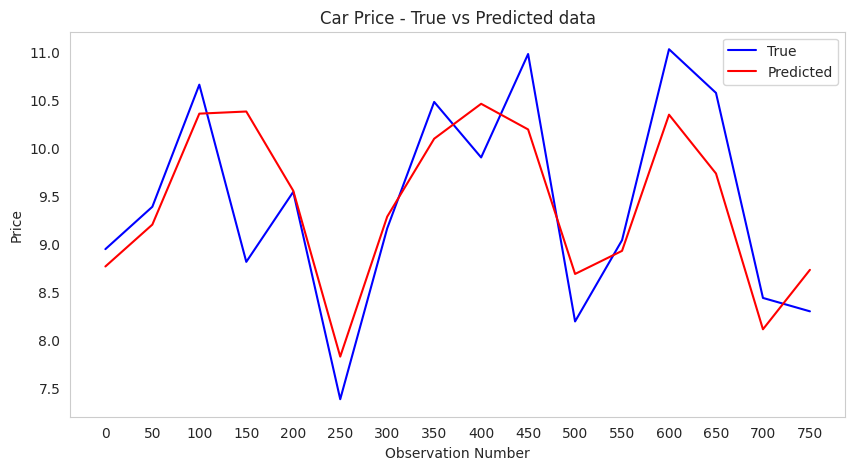

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

from sklearn.linear_model import SGDRegressor

lasso_reg_l1=SGDRegressor(penalty='l2',max_iter=150,alpha=0.0001)
lasso_reg_l1.fit(x_train,y_train)

y_pred=lasso_reg_l1.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test,y_pred))


plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('cross')
plt.show()

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

sgd_pred=y_pred

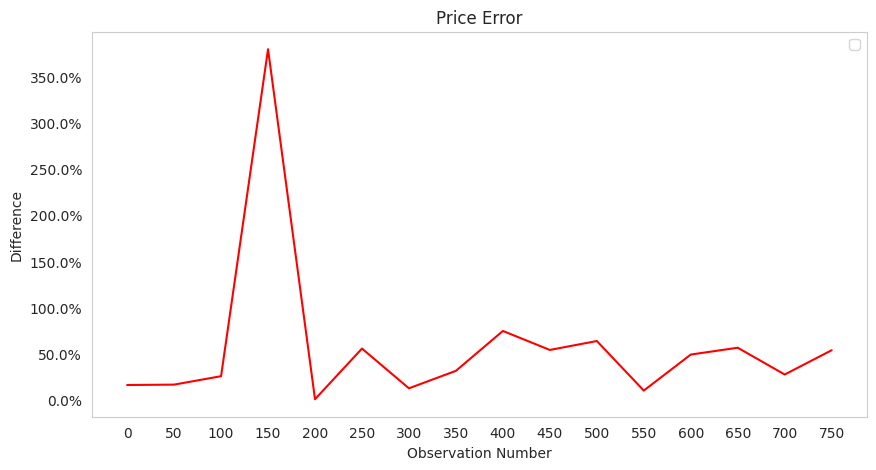

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MAE: 0.2558465170889511
MSE: 0.1429741627900727
RMSE: 0.37811924414141196
R2_score: 0.8258541882790557


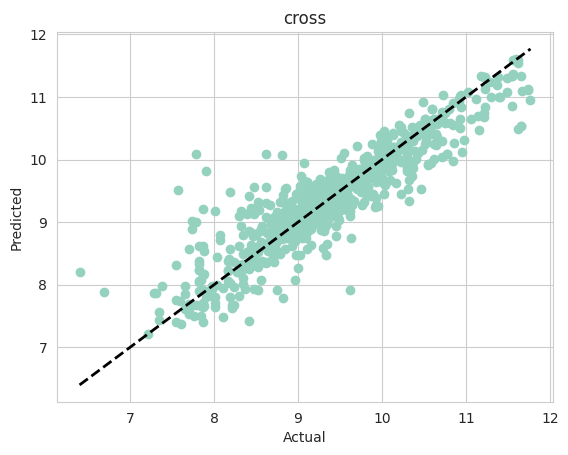

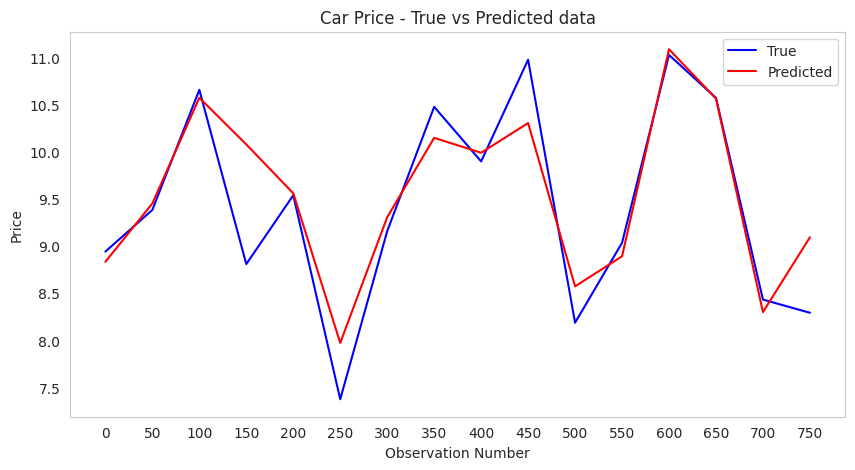

In [ ]:
# final kfold

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

X =  np.array(input_scaled2)
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []

# Iterate through folds
for train_index, val_index in kf.split(X):
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  model.fit(X_train, y_train)

y_pred=model.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score:',metrics.r2_score(y_test,y_pred))


plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('cross')
plt.show()

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

kfold_pred=y_pred


In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
780,8447.24,7750.00,-697.24,9.00
781,5505.71,7500.00,1994.29,26.59
782,13972.70,13200.00,-772.70,5.85
783,9746.63,10900.00,1153.37,10.58
784,5751.39,11500.00,5748.61,49.99


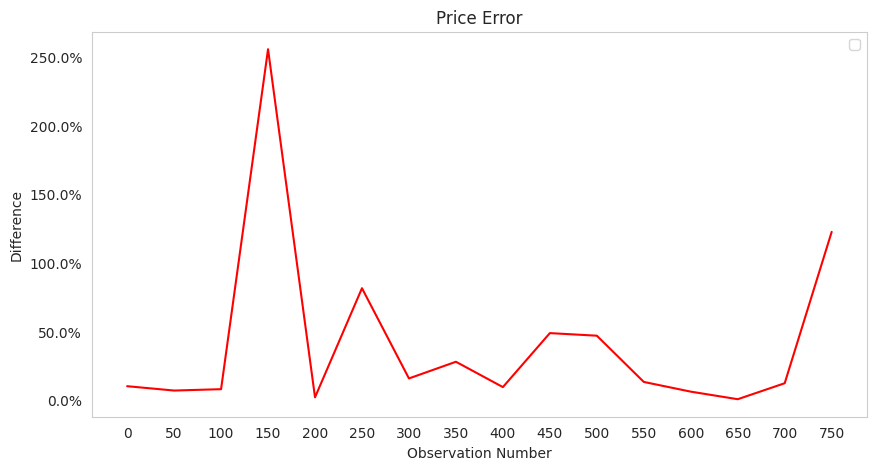

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

In [ ]:


# from sklearn.ensemble import RandomForestRegressor

# # n_estimators = no. of trees
# regressor = RandomForestRegressor(n_estimators=100,
#     max_depth=10,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     max_features='sqrt',
#     random_state=42,
#     n_jobs=-1,
#     oob_score=True)
# regressor.fit(x_train, y_train)
# y_pred = regressor.predict(x_test)

# print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("r2_score",metrics.r2_score(y_test,y_pred))

# # Plot the predicted values against the actual values for Random Forest
# plt.scatter(y_test, y_pred)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Random Forest Regression')
# plt.show()

# gap=50

# train_seg=y_test[::gap]
# pred_seg=y_pred[::gap]

# # number_of_observations=len(y_train)
# x_ax =np.arange(len(train_seg))*gap
# # print(x_ax)
# plt.figure(figsize=(10,5))
# plt.plot(x_ax, train_seg, label="True" , color='blue')
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
# plt.title("Car Price - True vs Predicted data")
# plt.xlabel('Observation Number')
# plt.ylabel('Price')
# plt.xticks(x_ax)
# plt.legend()
# plt.grid()
# plt.show()

# rf_pred=y_pred

In [ ]:
# # To obtain the actual prices, we take the exponential of the log_price
# df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

# y_test = y_test.reset_index(drop=True)
# df_ev['Actual Price'] = np.exp(y_test)

# df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
# df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)

test model
MAE: 0.2643217136101547
MSE: 0.1627325997232538
RMSE: 0.4034012886980578
r2_score 0.8017879586126644


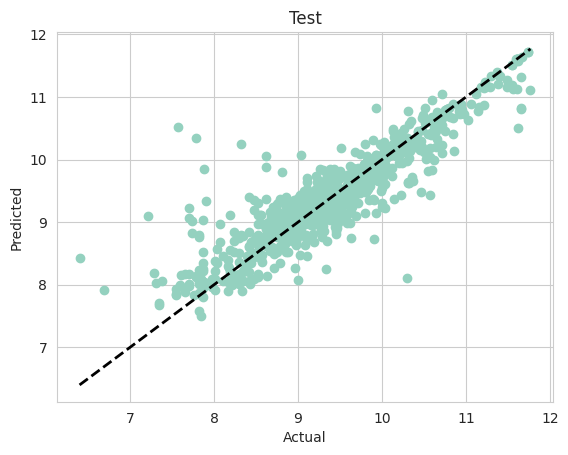

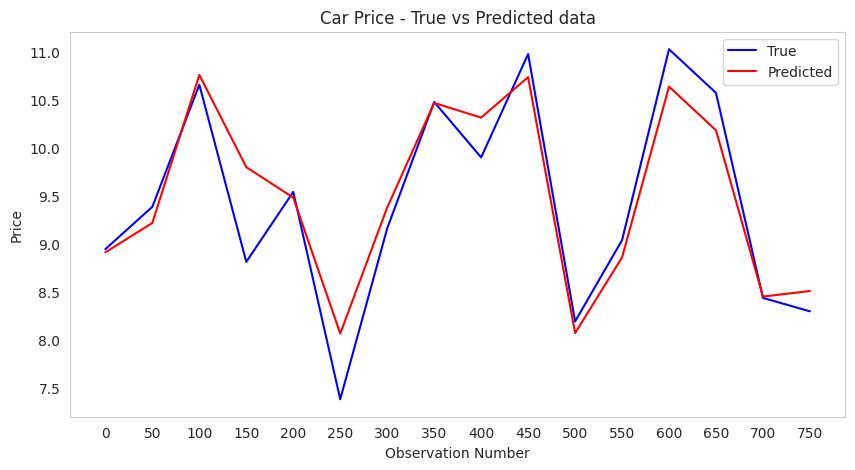

In [ ]:
# extra added
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

regressor = RandomForestRegressor(n_estimators=1500, random_state=42)

# predicted_values = cross_val_predict(regressor, x_train, y_train, cv=5)

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

# y_pred_train=regressor.predict(x_train)

print('test model')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score",metrics.r2_score(y_test,y_pred))


# Plot the predicted values against the actual values for Random Forest
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test')
plt.show()
# r2 score is 0.80 for 1000

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

rfr_pred=y_pred

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
780,7479.34,7750.00,270.66,3.49
781,5992.31,7500.00,1507.69,20.10
782,9607.38,13200.00,3592.62,27.22
783,9030.76,10900.00,1869.24,17.15
784,11253.18,11500.00,246.82,2.15


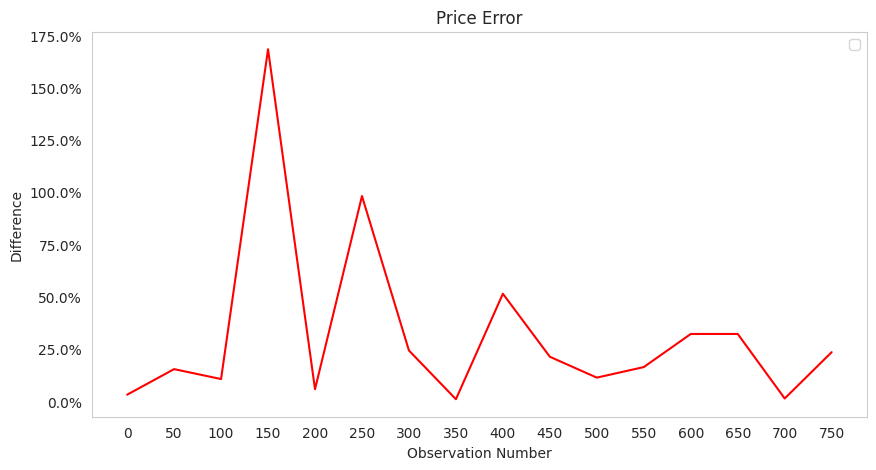

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

XGradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
MAE: 0.2503001708468737
MSE: 0.13985917162545075
RMSE: 0.37397750149634773
r2_score 0.829648319010656


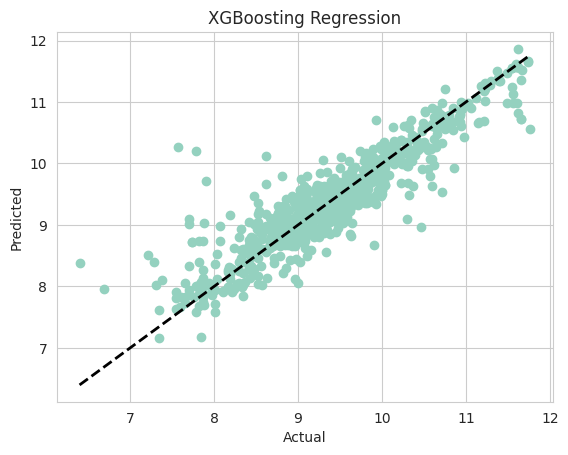

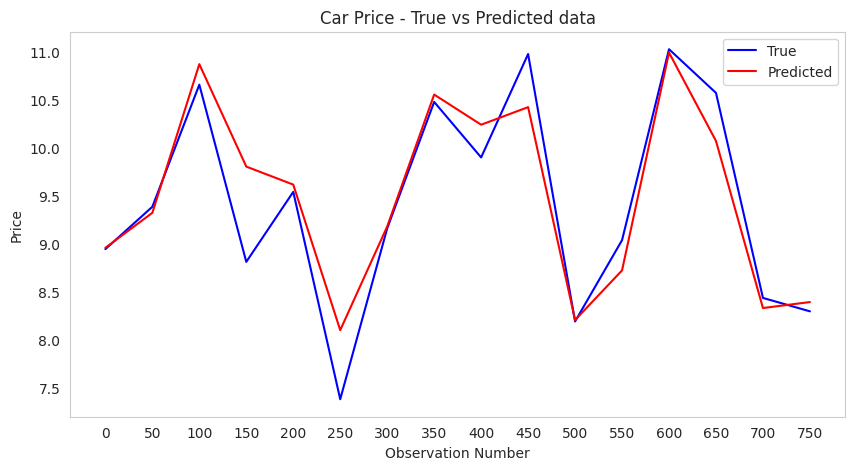

In [ ]:
# final

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgboost_model = xgb.XGBRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the full training set
best_xgboost_model = xgb.XGBRegressor(**best_params)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)
best_xgboost_model.fit(x_train, y_train)

y_pred = best_xgboost_model.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score",metrics.r2_score(y_test,y_pred))

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoosting Regression')
plt.show()

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

xgb_pred=y_pred

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,7759.39,7650.00,-109.39,1.43
1,15430.20,12500.00,-2930.20,23.44
2,5453.20,5000.00,-453.20,9.06
3,13543.75,8999.00,-4544.75,50.50
4,5782.13,6500.00,717.87,11.04
...,...,...,...,...
780,7859.75,7750.00,-109.75,1.42
781,5795.33,7500.00,1704.67,22.73
782,10577.46,13200.00,2622.54,19.87
783,8594.13,10900.00,2305.87,21.15


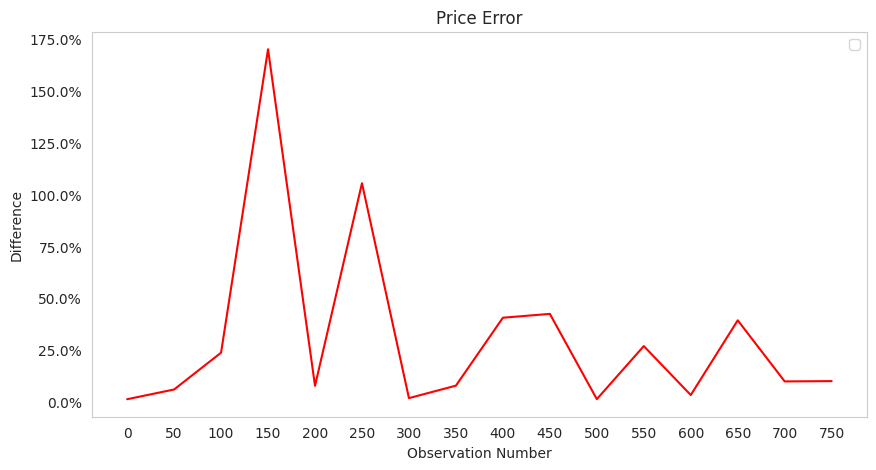

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

MAE: 0.24555981463133958
MSE: 0.13180377246700967
RMSE: 0.36304789280067395
r2_score 0.839459980067505


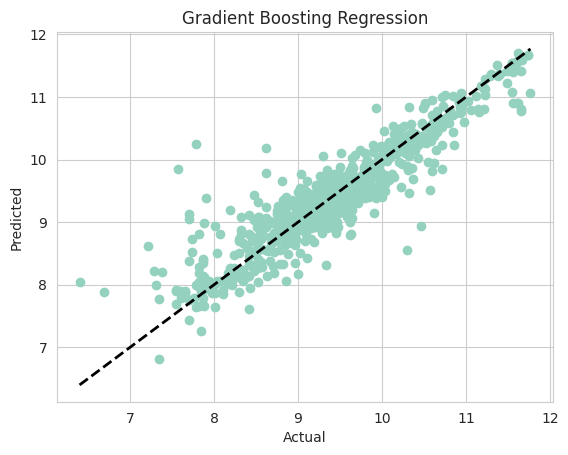

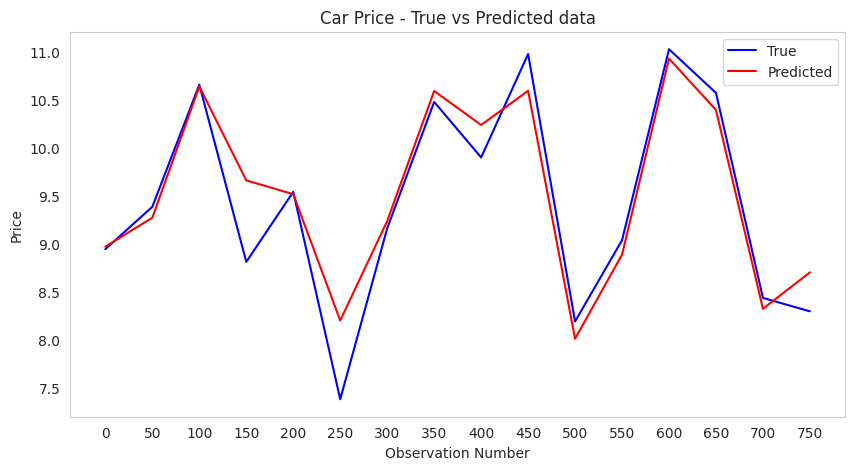

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

r2=0
n_estimators= [100, 200, 300, 400]
learning_rate= [0.01, 0.1, 0.2, 0.05]
max_depth=[3, 4, 5, 6, 7, 8]
min_samples_split= [2, 5, 10]
min_samples_leaf=[1, 2, 4]

for n in n_estimators:
  for lr in learning_rate:
    for depth in max_depth:
      for split in min_samples_split:
        for leaf in min_samples_leaf:
          regressor = GradientBoostingRegressor(random_state=42,n_estimators=n,learning_rate=lr,max_depth=depth,min_samples_split=split,min_samples_leaf=leaf)
          regressor.fit(x_train,y_train)
          y_pred=regressor.predict(x_test)
          if metrics.r2_score(y_test,y_pred)>r2:
            r2=metrics.r2_score(y_test,y_pred)
            fn=n
            flr=lr
            fdepth=depth
            fsplit=split
            fleaf=leaf

regressor = GradientBoostingRegressor(random_state=42,n_estimators=fn,learning_rate=flr,max_depth=fdepth,min_samples_split=fsplit,min_samples_leaf=fleaf)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score",metrics.r2_score(y_test,y_pred))

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression')
plt.show()

gap=50

train_seg=y_test[::gap]
pred_seg=y_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

gbt_pred=y_pred

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,7851.31,7650.00,-201.31,2.63
1,14485.34,12500.00,-1985.34,15.88
2,5167.45,5000.00,-167.45,3.35
3,13164.73,8999.00,-4165.73,46.29
4,5166.05,6500.00,1333.95,20.52
...,...,...,...,...
780,8020.46,7750.00,-270.46,3.49
781,6808.18,7500.00,691.82,9.22
782,10166.24,13200.00,3033.76,22.98
783,8298.59,10900.00,2601.41,23.87


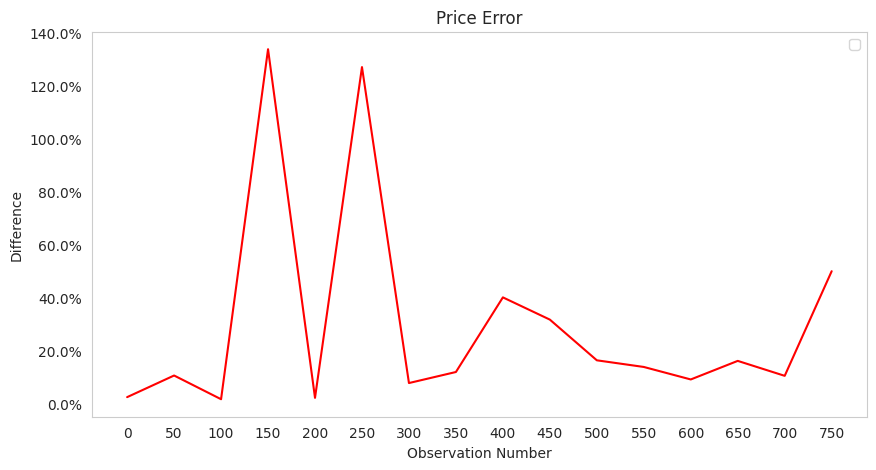

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

# df_ev.tail(5)
# print(max(df_ev['Difference%']))

x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(fn , flr, fdepth , fsplit , fleaf)

200 0.2 6 5 1


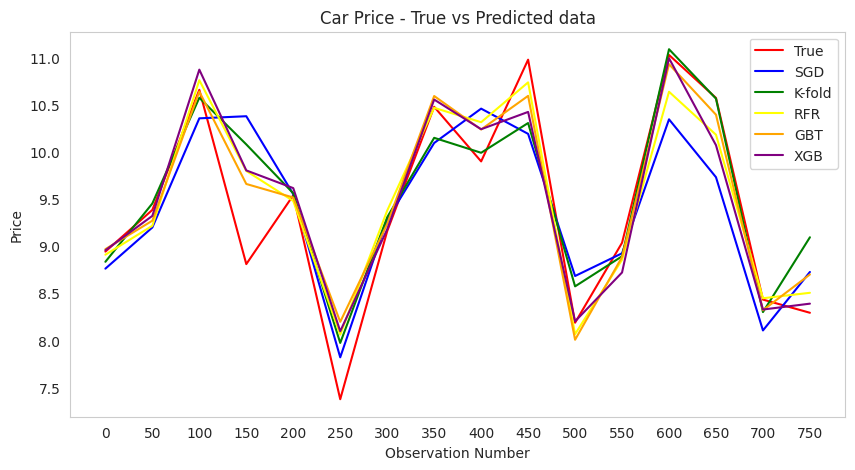

In [ ]:
gap=50

train_seg=y_test[::gap]
pred1_seg=sgd_pred[::gap]
pred2_seg=kfold_pred[::gap]
pred3_seg=rfr_pred[::gap]
pred4_seg=gbt_pred[::gap]
pred5_seg=xgb_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(10,5))
plt.plot(x_ax, train_seg, label="True" , color='red')
plt.plot(x_ax, pred1_seg, label="SGD" , color='blue')
plt.plot(x_ax, pred2_seg, label="K-fold" , color='green')
plt.plot(x_ax, pred3_seg, label="RFR" , color='yellow')
plt.plot(x_ax, pred4_seg, label="GBT" , color='orange')
plt.plot(x_ax, pred5_seg, label="XGB" , color='purple')
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

# gbt_pred=y_pred